# 吴恩达深度学习第二周编程作业

## 题目部分

先来看一下 英文的题目部分

Logistic Regression with a Neural Network mindset
Welcome to your first (required) programming assignment! You will build a logistic regression classifier to recognize cats. This assignment will step you through how to do this with a Neural Network mindset, and so will also hone your intuitions about deep learning.

Instructions:

Do not use loops (for/while) in your code, unless the instructions explicitly ask you to do so.
You will learn to:

Build the general architecture of a learning algorithm, including:
Initializing parameters
Calculating the cost function and its gradient
Using an optimization algorithm (gradient descent)
Gather all three functions above into a main model function, in the right order.

### 简单解释一下要求  
要求我们建议一个逻辑回归分类器来识别猫的图片  

#### 要求如下：  
* 不要在代码中使用循环（for/while），除非指令明确要求您这样做。  

* 算法的架构如下：  
1. 参数初始化  
2. 成本函数及梯度的计算  
3. 优化算法  

你需要编写上面提到的方法，并进行组合，成为一个模型

#### 数据集概述
这里会提供给我们一个数据集，名字为”data.h5“(和下面代码用的是同一个数据集，不过名字改成了”train_catvnoncat.h5“)  
里面包含了相关数据集，更具体的可以看代码的数据导入方法。 
主要包括：  
1. 标签设置好的训练集，标记是否为cat(0/1)  
2. 标签设置好的测试集  
3. 图片的形状为(64, 64, 3)  


数据集及代码附上链接--> [陈能豆](https://pan.baidu.com/s/1GR6-mGM6GNN1JVU1MEAFjQ)  
提取密码：lj4w

#### ok  下面看代码


In [98]:
pip --version   # 这里看一下python的版本  ，3.6 以及别的版本应该也是可行的   

pip 21.1 from /Users/chenchangming/opt/anaconda3/lib/python3.8/site-packages/pip (python 3.8)
Note: you may need to restart the kernel to use updated packages.


### 代码部分

#### 代码段后面附上相关重点提示 
#### 相关函数用法 不会的百度

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import random
# 下面两个用于测试模型 
from PIL import Image
import imageio

导入相关包

In [3]:
# 导入数据函数
def load_datasets():
    
    train_datasets = h5py.File('datasets/train_catvnoncat.h5',"r")
    train_set_x_origi = np.array(train_datasets["train_set_x"][:])
    train_set_y_origi = np.array(train_datasets["train_set_y"][:])
    # 读取训练集
    
    
    test_datasets = h5py.File('datasets/test_catvnoncat.h5',"r")
    test_set_x_origi = np.array(test_datasets["test_set_x"][:])
    test_set_y_origi = np.array(test_datasets["test_set_y"][:])
    # 测试集
    
    
    classes = np.array(test_datasets["list_classes"][:])
    # 存储可能的结果   0 non-cat  1  cat
    
    # 初始化矩阵格式
    train_set_y_origi = train_set_y_origi.reshape( (1,train_set_y_origi.shape[0]) )
    test_set_y_origi = test_set_y_origi.reshape( (1,test_set_y_origi.shape[0]) )
    
    return train_set_x_origi,train_set_y_origi,test_set_x_origi,test_set_y_origi,classes
    
    

从数据集中导入数据  其中classes 用于存储可能的结果  
classes: array([b'non-cat', b'cat'], dtype='|S7')

In [4]:
# 读入数据
train_set_x_origi,train_set_y,test_set_x_origi,test_set_y,classes = load_datasets()

The picture number is 207  The ans is non-cat
使用np.squeeze：0
不使用np.squeeze： [0]


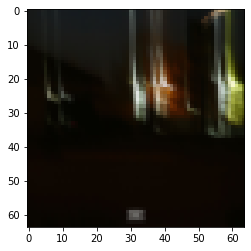

In [5]:
# 显示一下训练集的数据
index = random.randint(1,train_set_y.shape[1])

plt.imshow(train_set_x_origi[index])
# 打印图片

# 打印结果
print( "The picture number is " +str(index) + "  The ans is " +classes[ np.squeeze(train_set_y[:,index])].decode("utf-8") )

print("使用np.squeeze：" + str(np.squeeze(train_set_y[:,index])) )
print("不使用np.squeeze： " + str(train_set_y[:,index])  )


显示的是数据集中随机的一张图片及结果
可改为指定编号  
squeeze 函数的作用为压缩维度  
是否使用squeeze的区别见代码


In [6]:
# 查看矩阵维数
im_number_train = train_set_y.shape[1]
im_number_test = test_set_y.shape[1]
im_size = train_set_x_origi.shape[1]

# 打印
print("训练集图片数量： "+str(im_number_train))
print("测数集图片数量： "+str(im_number_test))
print("图片宽度高度为： "+str(im_size))
print("每张图片大小为" +str(im_size)+","+str(im_size)+",3")
print("训练集x维数为 "+str(train_set_x_origi.shape))
print("训练集y维数为 "+str(train_set_y.shape))
print("测试集x维数为 "+str(test_set_x_origi.shape))
print("测试集y维数为 "+str(test_set_y.shape))

训练集图片数量： 209
测数集图片数量： 50
图片宽度高度为： 64
每张图片大小为64,64,3
训练集x维数为 (209, 64, 64, 3)
训练集y维数为 (1, 209)
测试集x维数为 (50, 64, 64, 3)
测试集y维数为 (1, 50)


shaape 函数 返回矩阵维数  
返回数据类型为n元组   可通过下标引用

In [7]:
# 降维  数据预处理
train_set_x_flatten = train_set_x_origi.reshape(train_set_x_origi.shape[0],-1).T
test_set_x_flatten = test_set_x_origi.reshape(test_set_x_origi.shape[0],-1).T

# 打印降维后的维数

print("训练集降维后的维数为 "+str(train_set_x_flatten.shape))
print("测试集降维后的维数为 "+str(test_set_x_flatten.shape))

训练集降维后的维数为 (12288, 209)
测试集降维后的维数为 (12288, 50)


reshape 函数用于改变矩阵维数  
-1 表示 自动计算下一维度   

In [8]:
# 核对维数
print("训练集x的位数为 "+str(train_set_x_flatten.shape))
print("训练集y维数为 "+str(train_set_y.shape))
print("测试集x的维数为 "+str(test_set_x_flatten.shape))
print("测试集y维数为 "+str(test_set_y.shape))

训练集x的位数为 (12288, 209)
训练集y维数为 (1, 209)
测试集x的维数为 (12288, 50)
测试集y维数为 (1, 50)


In [9]:
# 数据标准化
# 图片存储的值为像素值    0-255
# 例如数据集中
print(np.amax(train_set_x_flatten))
print(np.amin(train_set_x_flatten))

train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

255
0


In [10]:
def sigmoid(z):
    # 参数为z数组
    
    # 返回s = sigmoid(z)
    
    s = 1/(1+np.exp(-z))
    
    return s

激活函数有很多种    
![image.png](attachment:image.png "激活函数")
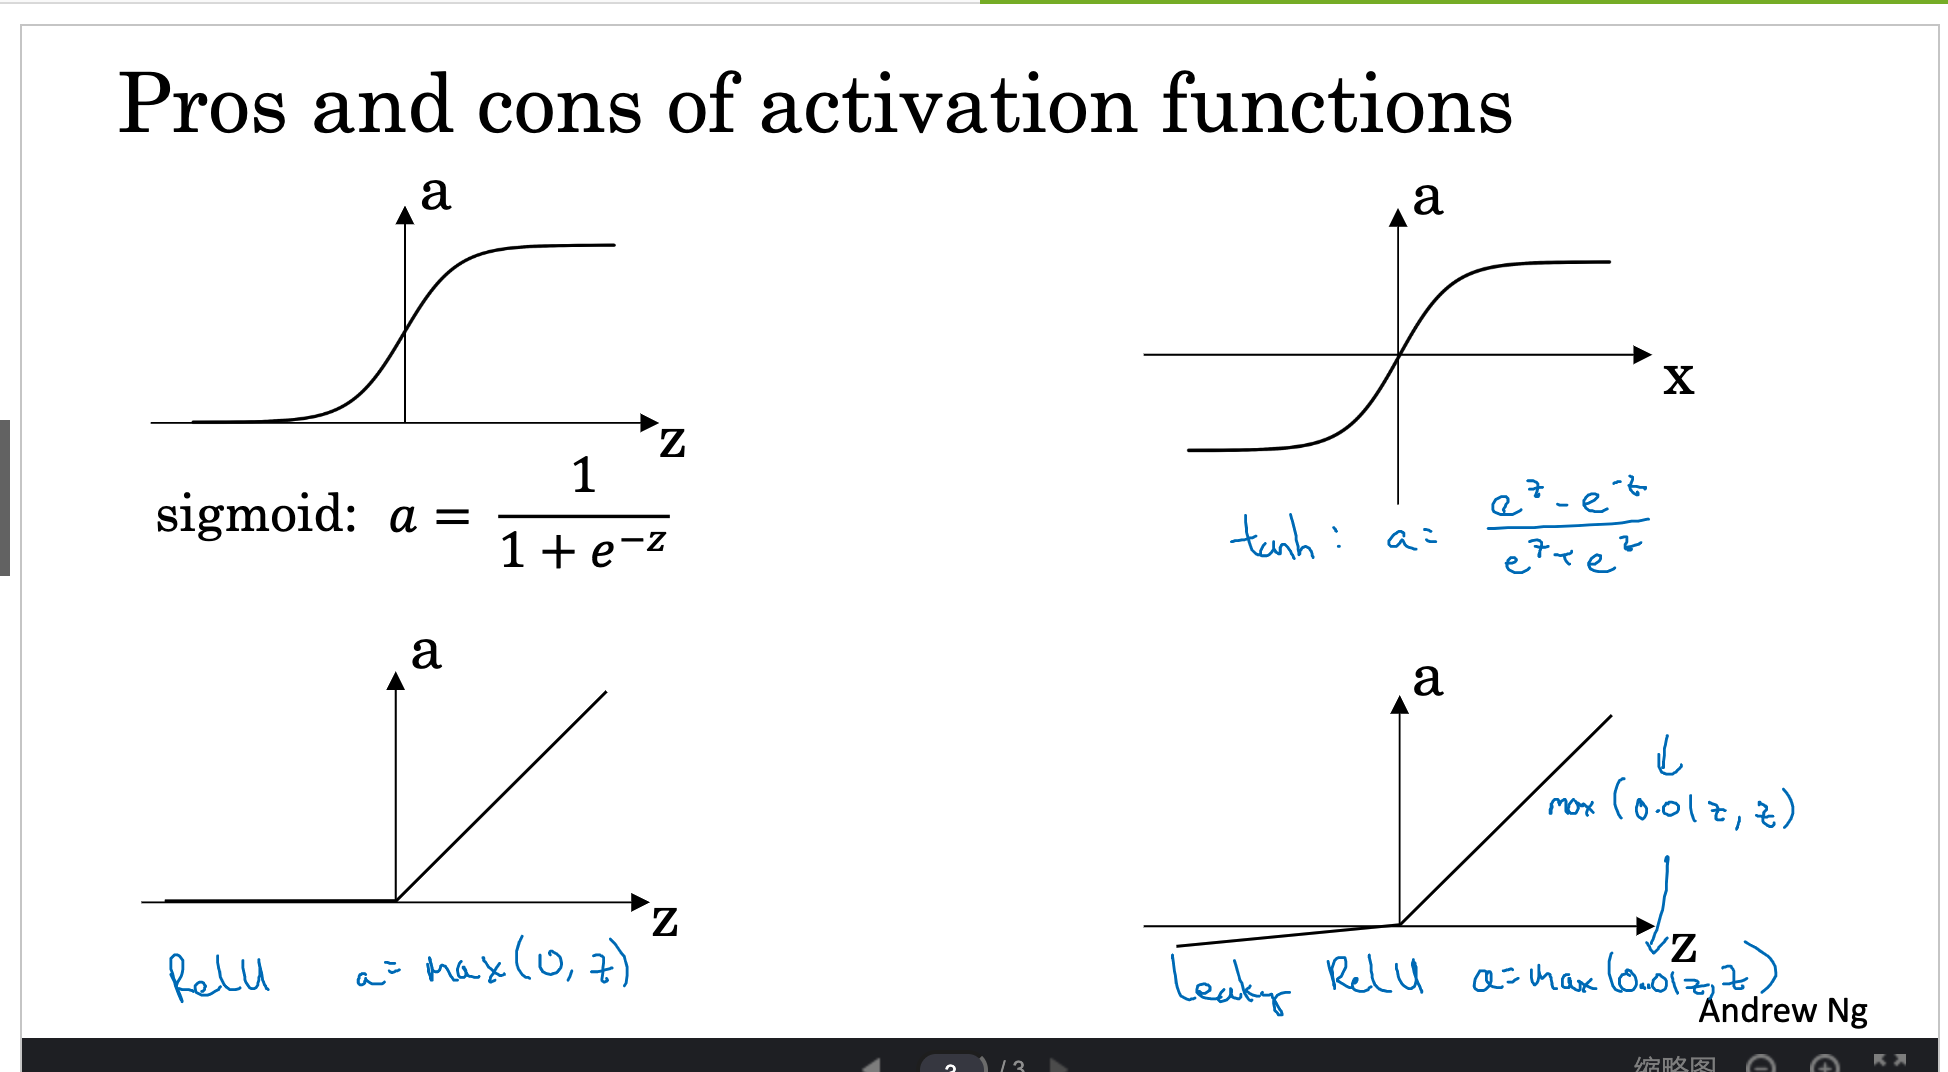

In [11]:
# 测试siggmod 函数 是否符合预期
print( "sigmoid(0) = "+str(sigmoid(0)))
print( "sigmoid(1) = "+str(sigmoid(1)))
print( "sigmoid(10) = "+str(sigmoid(10)))
print( "sigmoid(-1) = "+str(sigmoid(-1)))
print( "sigmoid(-10) = "+str(sigmoid(-10)))

sigmoid(0) = 0.5
sigmoid(1) = 0.7310585786300049
sigmoid(10) = 0.9999546021312976
sigmoid(-1) = 0.2689414213699951
sigmoid(-10) = 4.5397868702434395e-05


In [12]:
def initialize_zeros_vector(size): 
    # 函数作用 生成 并返回一个(size,1) 的0向量  同时初始化 b=0
    
    
    w = np.zeros( (size,1) )
    b = 0
    
    # 断言确保维数
    assert( w.shape== (size,1) )
    assert( isinstance(b,float) or isinstance(b,int) )
    
    return (w , b)

    

In [13]:
def  two_way_propogate(W,b,X,Y ):
    # 实现正向传播和反向传播
    
    m = X.shape[1]
    
    # 正向传播 
    
    A = sigmoid(np.dot(W.T,X )+b)
    cost = (-1/m)*np.sum(Y*np.log(A)  + (1-Y)*np.log(1-A))
    
    # 反向传播
    dw = (1/m)* np.dot(X,(A-Y).T)
    db = (1/m)* np.sum(A-Y)
    
    assert(dw.shape==W.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    
    # 存储dw db
    grads = {
        "dw":dw,
        "db":db
    }
    
    return grads, cost

    
    

### 这里附上课程中求导计算过程中的部分截图，便于理解  
向量化之前：   
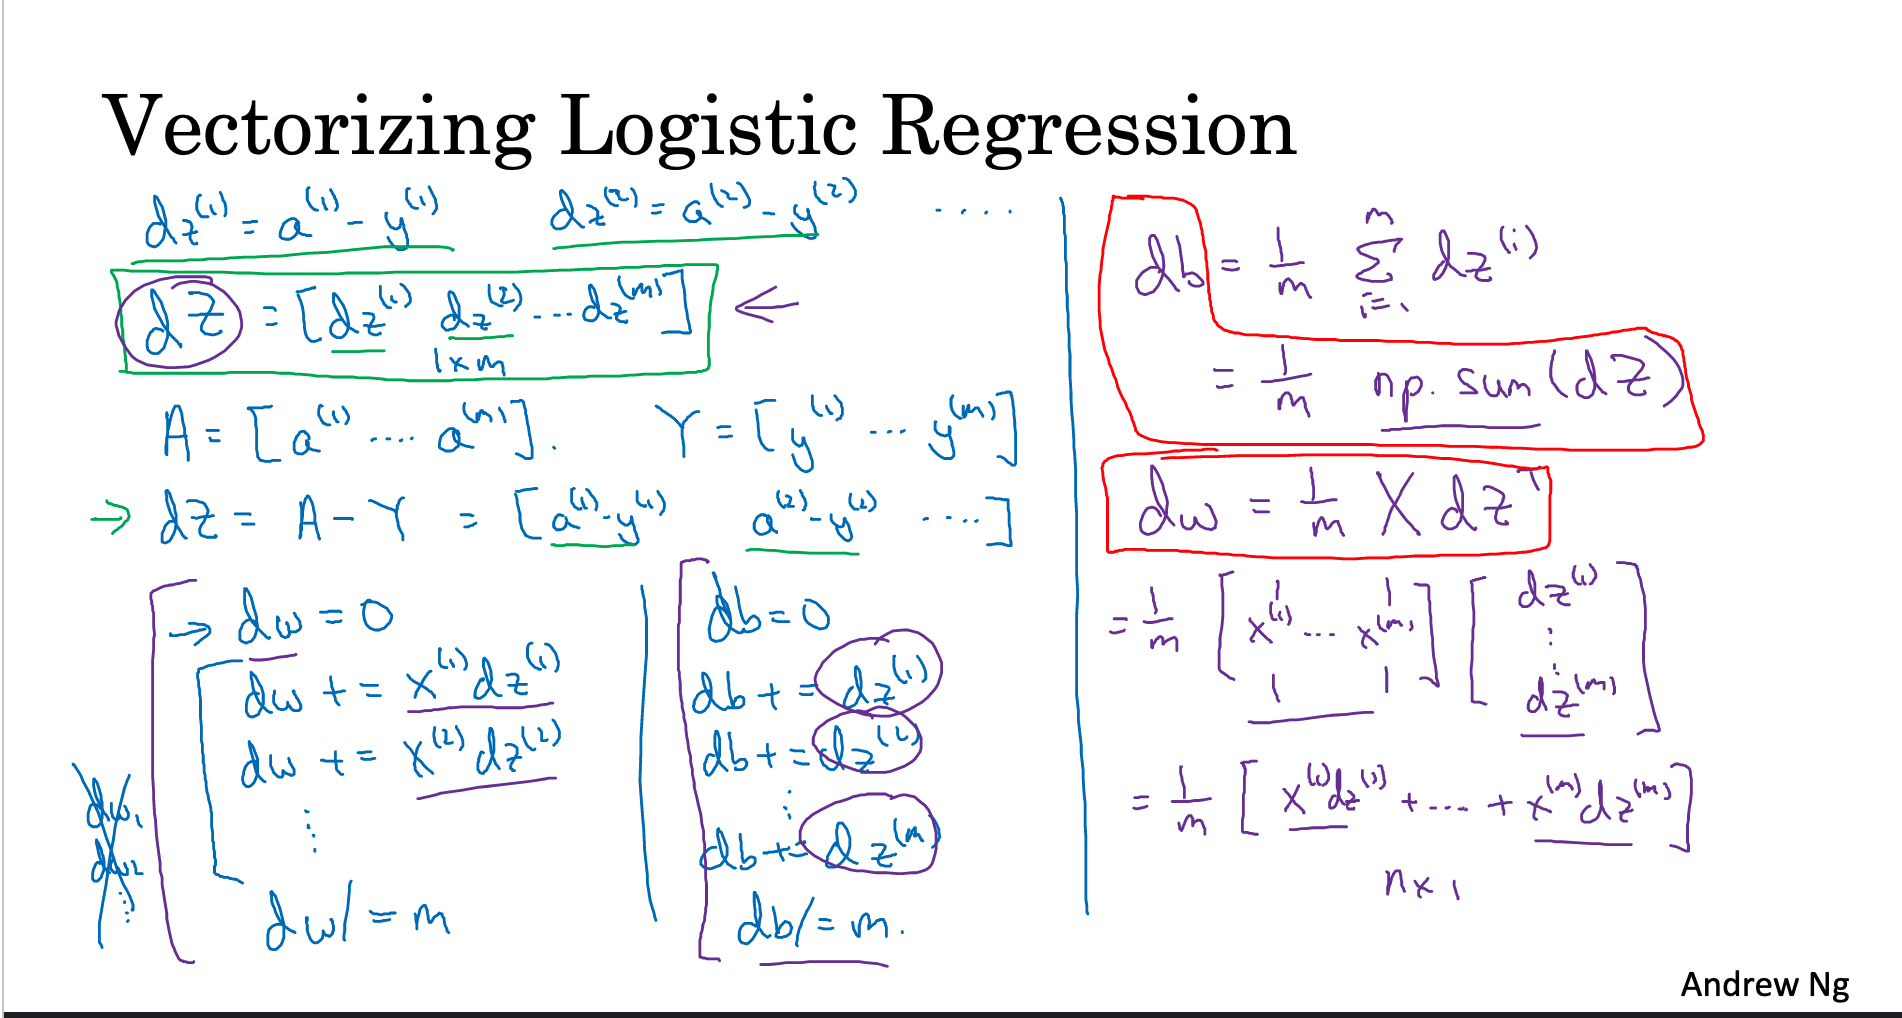
向量化后：  
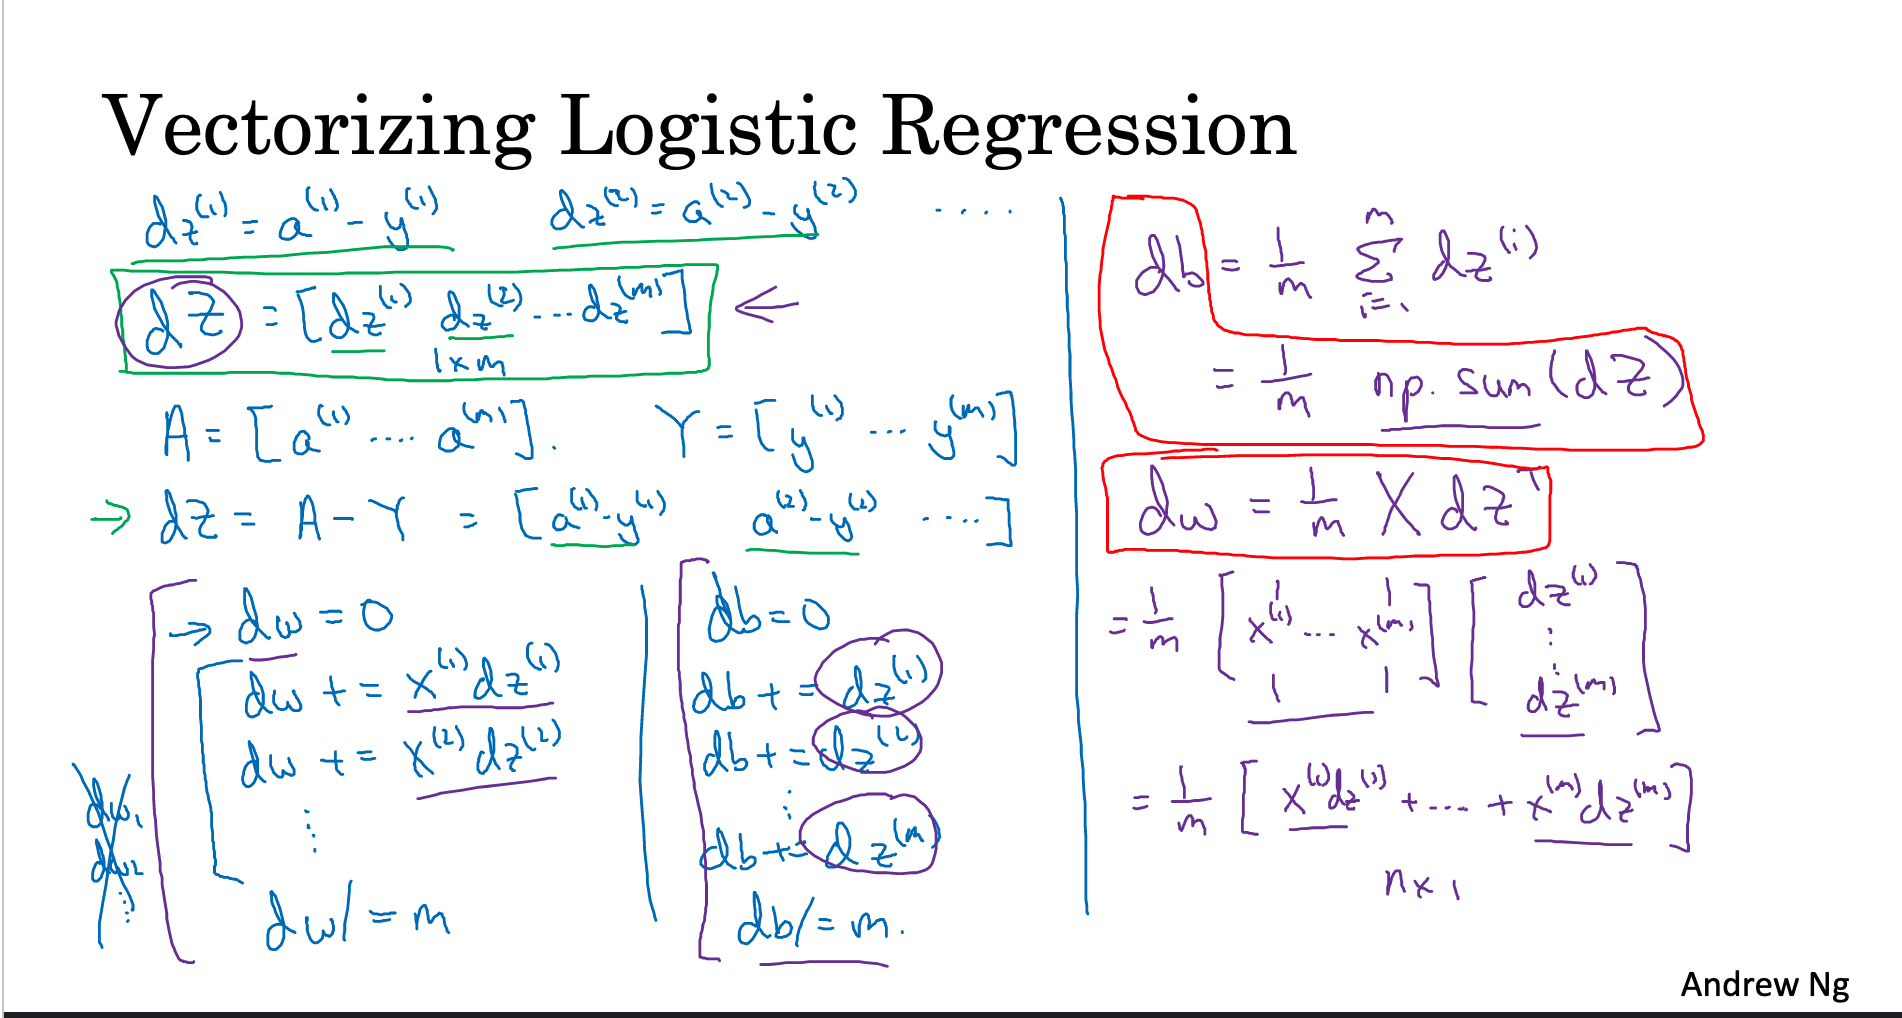

In [14]:
# 测试 two_way_propogate 
# 随便初始化一些参数
W ,b ,X, Y = np.array([ [2],[2] ]),2,np.array([ [1,0],[0,0] ]),np.array([0,0])
grabs, cost = two_way_propogate(W,b,X,Y)
print("dw = " + str(grabs["dw"]))
print("db = " + str(grabs["db"]))
print("cost = " + str(cost))
# 迭代一次 看效果如何
learning_rate = 0.1
W = W -learning_rate*grabs["dw"]
b= b- learning_rate * grabs["db"]
grads, cost = two_way_propogate(W,b,X,Y)
print("迭代一次后")
print("dw = " + str(grabs["dw"]))
print("db = " + str(grabs["db"]))
print("cost = " + str(cost))

dw = [[0.4910069]
 [0.       ]]
db = 0.9314054340078954
cost = 3.072538969480391
迭代一次后
dw = [[0.4910069]
 [0.       ]]
db = 0.9314054340078954
cost = 2.962005299707603


In [15]:
def optimize( W , b , X , Y , num_iteration , learning_rate , print_cost=False , print_frequency = 100):
    # 该函数作用 运用梯度下降优化W 和b
    # 参数描述放在下面 
    """
    此函数通过运行梯度下降算法来优化w和b
    
    参数：
        w  - 权重，大小不等的数组（num_px * num_px * 3，1）
        b  - 偏差，一个标量
        X  - 维度为（num_px * num_px * 3，训练数据的数量）的数组。
        Y  - 真正的“标签”矢量（如果非猫则为0，如果是猫则为1），矩阵维度为(1,训练数据的数量)
        num_iterations  - 优化循环的迭代次数
        learning_rate  - 梯度下降更新规则的学习率
        print_cost  - 每100步打印一次损失值
    
    返回：
        params  - 包含权重w和偏差b的字典
        grads  - 包含权重和偏差相对于成本函数的梯度的字典
        成本 - 优化期间计算的所有成本列表，将用于绘制学习曲线。
    
    提示：
    我们需要写下两个步骤并遍历它们：
        1）计算当前参数的成本和梯度，使用propagate（）。
        2）使用w和b的梯度下降法则更新参数。
    """
    costs =[]
    for i in range(num_iteration):
        grads , cost = two_way_propogate( W , b, X , Y )
        
        dw = grads["dw"]
        db = grads["db"]
        W = W- dw * learning_rate
        b = b- db * learning_rate
        
        if(i%print_frequency==0):
            costs.append(cost)
        
        
        if(print_cost and i%print_frequency==0):
            print("迭代次数为：%i , 误差值为：  %f" % (i,cost))
    
    
    params = {
        "W": W,
        "b": b
    }
    
    grads = {
        "dw": dw,
        "db": db
    }
    
    return (params , grabs , costs)




        w  - 权重矩阵
        b  - 偏差值  一个数
        X  - 维度为 训练集
        Y  - 训练标签集 真正的“标签”矢量（如果非猫则为0，如果是猫则为1），矩阵维度为(1,训练数据的数量)
        num_iterations  - 优化循环的迭代次数
        learning_rate  - 梯度下降更新规则的学习率
        print_cost  - 是否打印cost
        print_frequency - 打印频率，迭代多少次打印一次cost

In [16]:
# 测试 optimize
W, b, X, Y = np.array([[2], [3]]), 3, np.array([[0,1], [2,2]]), np.array([[0, 2]])
params , grads , costs = optimize(W , b , X , Y , num_iteration=100 , learning_rate = 0.009)
print ("w = " + str(params["W"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))


w = [[2.45000606]
 [3.00012317]]
b = 3.000061583925239
dw = [[0.4910069]
 [0.       ]]
db = 0.9314054340078954


In [17]:
def predict(W , b , X):
    
    # 根据参数 预测结果
    
    m = X.shape[1]
    
    # 这里参数的维度假设是符合的  不需要判断
    
    A = sigmoid( np.dot(W.T,X )+b)
    
    assert(A.shape==(1,m))
    for i in range(A.shape[1]):
        
        A[0,i] = 1 if A[0,i] >0.5  else 0
    # 默认0.5为临界值 
    
    assert(A.shape==(1,m) )
    
    return A
    



这里的0.5 可以修改为一个指定的临界值    或设置为参数

In [18]:
# 测试predict
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
print("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1.]]


In [19]:
def model ( X_train , Y_train , X_test , Y_test , num_iterations = 2000 , learning_rate = 0.5, print_cost = False , print_frequency = 100):
    
    
    W , b = initialize_zeros_vector(X_train.shape[0])
    parameters , grabs , costs = optimize(W , b , X_train , Y_train , num_iterations , learning_rate , print_cost, print_frequency)
    
                                          
    W , b = parameters["W"] , parameters["b"]
    # 预测测试集
    Y_prediction_tset = predict(W , b , X_test)
    Y_prediction_train = predict(W , b , X_train)
    
    # 打印准确性
    print("训练集准确性： " , format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100 ) , "%")
    print("测试集准确性： " , format(100 - np.mean(np.abs(Y_prediction_tset - Y_test)) * 100 ) , "%")
    
    
    
    d = {
        "costs" : costs,
        "Y_prediction_test" : Y_prediction_tset,
        "Y_prediction_train" : Y_prediction_train,
        "W" : W,
        "b" : b,
        "learning_rate" : learning_rate,
        "num_iterations" : num_iterations
    }
    
    return d
     

In [20]:
# 测数model
d = model(train_set_x,train_set_y,test_set_x,test_set_y,num_iterations=2000,learning_rate=0.005,print_cost=True)

迭代次数为：0 , 误差值为：  0.693147
迭代次数为：100 , 误差值为：  0.584508
迭代次数为：200 , 误差值为：  0.466949
迭代次数为：300 , 误差值为：  0.376007
迭代次数为：400 , 误差值为：  0.331463
迭代次数为：500 , 误差值为：  0.303273
迭代次数为：600 , 误差值为：  0.279880
迭代次数为：700 , 误差值为：  0.260042
迭代次数为：800 , 误差值为：  0.242941
迭代次数为：900 , 误差值为：  0.228004
迭代次数为：1000 , 误差值为：  0.214820
迭代次数为：1100 , 误差值为：  0.203078
迭代次数为：1200 , 误差值为：  0.192544
迭代次数为：1300 , 误差值为：  0.183033
迭代次数为：1400 , 误差值为：  0.174399
迭代次数为：1500 , 误差值为：  0.166521
迭代次数为：1600 , 误差值为：  0.159305
迭代次数为：1700 , 误差值为：  0.152667
迭代次数为：1800 , 误差值为：  0.146542
迭代次数为：1900 , 误差值为：  0.140872
训练集准确性：  99.04306220095694 %
测试集准确性：  70.0 %


<function matplotlib.pyplot.show(*args, **kw)>

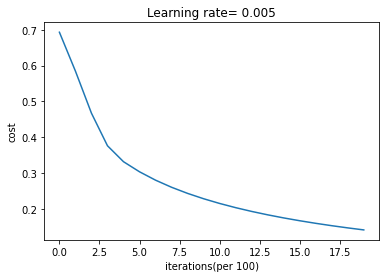

In [21]:
costs = np.squeeze( d["costs"] )
plt.plot(costs)
plt.ylabel("cost")
plt.xlabel("iterations(per 100)")
plt.title("Learning rate= "+ str(d["learning_rate"]))
plt.show

learning_rate is: 0.01
训练集准确性：  99.52153110047847 %
测试集准确性：  70.0 %


learning_rate is: 0.001
训练集准确性：  91.38755980861244 %
测试集准确性：  68.0 %


learning_rate is: 0.0001
训练集准确性：  71.29186602870814 %
测试集准确性：  40.0 %




<function matplotlib.pyplot.show(*args, **kw)>

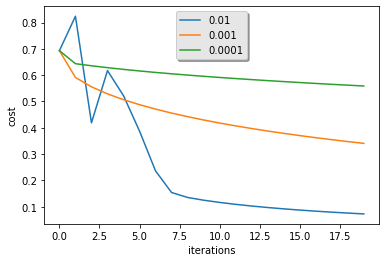

In [22]:
# 测试不同的学习率

learning_rates = [0.01,0.001,0.0001]
models = {}
for i in learning_rates:
    print("learning_rate is: " + str(i))
    models[str(i)]=model(train_set_x,train_set_y,test_set_x,test_set_y,num_iterations=2000,learning_rate=i,print_cost=False)
    print("\n")
    

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]  ), label= str(models[str(i)]["learning_rate"]))


plt.ylabel('cost')
plt.xlabel('iterations')
legend = plt.legend(loc='upper center' , shadow=True )
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show



In [23]:
def test_my_image( my_image):
    image_name = my_image
    fname = "images/" + my_image  # 在当前目录下有一个images文件夹  用于存放我们的图片 
    image = np.array(imageio.imread(fname))

    my_image = Image.fromarray(image).resize(( im_size , im_size ))
    my_image = np.array(my_image).reshape((1, im_size * im_size * 3)).T

    my_predicted_image = predict(d["W"], d["b"], my_image)

    plt.imshow(image)
    print("image name is: "+image_name)
    print( "y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

    

下面我们自己整一张图片试一试

<ipython-input-10-6b54a18d0391>:6: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-z))


image name is: my_image6.jpg
y = 0.0, your algorithm predicts a "non-cat" picture.


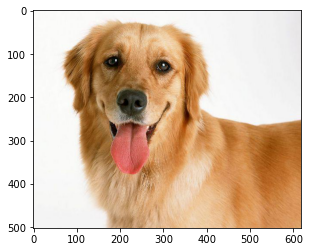

In [45]:
my_image1 = "my_image1.jpg" 
my_image2 = "my_image2.jpg"
my_image3 = "my_image3.jpg"
my_image4 = "my_image4.jpg"
my_image5 = "my_image5.jpg"
my_image6 = "my_image6.jpg"
# test_my_image(my_image2)
# test_my_image(my_image3)
# test_my_image(my_image5)
test_my_image(my_image6)

image name is: my_image1.jpg
y = 0.0, your algorithm predicts a "non-cat" picture.


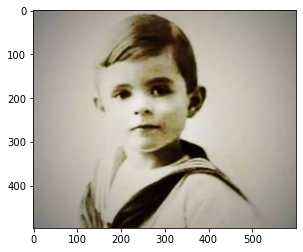

In [44]:
test_my_image(my_image1)

image name is: my_image4.jpg
y = 1.0, your algorithm predicts a "cat" picture.


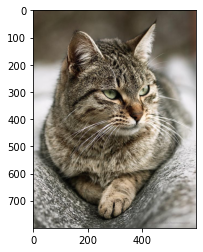

In [43]:
test_my_image(my_image4)

####  声明： 本人参考了[Kulbear](https://github.com/Kulbear/deep-learning-coursera) 的github上的文章 ，加以自己理解，编写了本篇内容。尽力让人轻松理解课程内容及作业